In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

## Dataset
https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

In [2]:
data = pd.read_csv('pima-indians-diabetes.csv')

display(data.info())
display(data.head())
display(data.describe())

display(data['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null int64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


None

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,33.240885,0.348958
std,3.369578,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,24.000000,0.000000
50%,3.000000,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,29.000000,0.000000
75%,6.000000,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,41.000000,1.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,1.000000


0    500
1    268
Name: Class, dtype: int64

## Feature Engineering

In [3]:
# Min Max Scaling
cols_to_scale = [
    'Number_pregnant', 
    'Glucose_concentration', 
    'Blood_pressure', 
    'Triceps', 
    'Insulin', 
    'BMI', 
    'Pedigree']

data[cols_to_scale] = data[cols_to_scale] \
    .apply(lambda x: (x - x.min()) / (x.max() - x.min()))

display(data.head())
display(data.describe())

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,33.240885,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,24.000000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,29.000000,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,41.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,1.000000


## Train/Test Split

In [4]:
X = data.drop('Class',axis=1)
y = data['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.33, random_state=101)

## Model: LinearClassifier

In [5]:
import tensorflow as tf

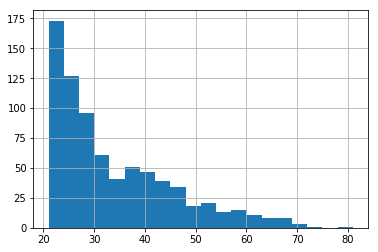

In [6]:
# Features
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')

# Categorical Feature
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(
    'Group',['A','B','C','D'])

# Continous feature to Categorical feature
display(data['Age'].hist(bins=20))
age = tf.feature_column.numeric_column('Age')
age_buckets = tf.feature_column.bucketized_column(
    age, boundaries=[20,30,40,50,60,70,80])

# feature col
feat_cols = [
    num_preg,
    plasma_gluc,
    dias_press,
    tricep,
    insulin,
    bmi,
    diabetes_pedigree,
    assigned_group,
    age_buckets]

In [7]:
# Estimator model: LinearClassifier
model = tf.estimator.LinearClassifier(
    feature_columns=feat_cols,
    n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpa8io7qqg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5fb6fbc550>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [8]:
# Train Input Function
train_input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_train, y=y_train,
    batch_size=10, num_epochs=1000, shuffle=True)

In [9]:
# Verbose = False
tf.logging.set_verbosity(tf.logging.WARN)

# Train Estimator
model.train(
    input_fn=train_input_func,
    steps=1000)

#### Evaluate Train 

In [10]:
results = model.evaluate(train_input_func)

results

{'accuracy': 0.7607004,
 'accuracy_baseline': 0.64785993,
 'auc': 0.81057024,
 'auc_precision_recall': 0.68218344,
 'average_loss': 0.518364,
 'label/mean': 0.35214007,
 'loss': 5.18364,
 'precision': 0.70422536,
 'prediction/mean': 0.3748809,
 'recall': 0.5524862,
 'global_step': 1000}

#### Evaluate Test 

In [11]:
# Test Input Function
test_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test, y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [12]:
results = model.evaluate(test_input_func)

results

{'accuracy': 0.71653545,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78869843,
 'auc_precision_recall': 0.6351482,
 'average_loss': 0.5335805,
 'label/mean': 0.34251967,
 'loss': 5.2126713,
 'precision': 0.5882353,
 'prediction/mean': 0.38688684,
 'recall': 0.57471263,
 'global_step': 1000}

#### Predict

In [13]:
# Predict Input Function
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [14]:
y_test_pred = model.predict(pred_input_func)

In [15]:
y_test_pred_list = []
for pred in y_test_pred:
    y_test_pred_list.append(pred['class_ids'][0])

In [16]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_pred_list))

[[132  35]
 [ 37  50]]


In [17]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_test_pred_list))

0.7165354330708661


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_list))

             precision    recall  f1-score   support

          0       0.78      0.79      0.79       167
          1       0.59      0.57      0.58        87

avg / total       0.72      0.72      0.72       254



## Model: DNN Classifier

In [19]:
# Categorical Feature as One-hot Vector 
embedded_group_column = tf.feature_column.embedding_column(
    assigned_group, 
    dimension=4)

# feature cols
feat_cols = [
    num_preg ,
    plasma_gluc,
    dias_press ,
    tricep ,
    insulin,
    bmi,
    diabetes_pedigree,
    embedded_group_column,
    age_buckets]

In [20]:
# Estimator model: LinearClassifier
model = tf.estimator.DNNClassifier(
    hidden_units=[10,10,10],
    feature_columns=feat_cols,
    n_classes=2)

In [21]:
# Train Input Function
train_input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_train, y=y_train,
    batch_size=10, num_epochs=1000, shuffle=True)

In [22]:
# Train Estimator
model.train(
    input_fn=train_input_func,
    steps=1000)

#### Evaluate Test 

In [23]:
# Test Input Function
test_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test, y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [24]:
results = model.evaluate(test_input_func)

results

{'accuracy': 0.72834647,
 'accuracy_baseline': 0.65748036,
 'auc': 0.80356526,
 'auc_precision_recall': 0.66521823,
 'average_loss': 0.534118,
 'label/mean': 0.34251967,
 'loss': 5.2179217,
 'precision': 0.59574467,
 'prediction/mean': 0.38774666,
 'recall': 0.6436782,
 'global_step': 1000}